### plots needed:
- Fraser climatology for Si, NO3, and NH4
    - EC: dot
    - MEOPAR: triangle 
- other rivers Si, NO3, and NH4
    - EC: dot
    - MEOPAR: triangle


In [1]:
# imports
import csv
import numpy as np
import pandas as pd
import datetime as dt
import os
import re
import netCDF4 as nc
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from salishsea_tools import evaltools as et

import matplotlib.gridspec as gridspec
import matplotlib as mpl
mpl.rc('xtick', labelsize=12) 
mpl.rc('ytick', labelsize=12) 
mpl.rc('legend', fontsize=12) 
mpl.rc('axes', titlesize=12) 
mpl.rc('axes', labelsize=12) 
mpl.rc('figure', titlesize=12) 
mpl.rc('font', size=12) 

%matplotlib inline

In [2]:
fnameO='/data/eolson/MEOPAR/NEMO-forcing-new/rivers-climatology/bio/R201809_2_bioClim_'
listFraserOldN=list()
listFraserOldSi=list()
year=2016 
for yearday in range(1,367):
    t2=dt.date(year, 1, 1) + dt.timedelta(days = yearday - 1)
    datestr='m'+t2.strftime('%m')+'d'+t2.strftime('%d')
    old=nc.Dataset(fnameO+datestr+'.nc')
    if yearday==1:
        print('201812 consts:','no3',old.variables['no3'][0,200,200],'sil:',old.variables['sil'][0,200,200])
        no3Other=old.variables['no3'][0,200,200]
        silOther=old.variables['sil'][0,200,200]
    listFraserOldN.append((old.variables['no3'][0,450,382]))
    listFraserOldSi.append((old.variables['sil'][0,450,382]))
    old.close()

201812 consts: no3 6.26 sil: 55.69


In [3]:
f=nc.Dataset('/data/eolson/MEOPAR/NEMO-forcing-new/rivers-climatology/bio/R201812_bioConst.nc')
vals,counts=np.unique(f.variables['nh4'][0,:,:],return_counts=True)
print(vals,counts)
f.close()

[4.09       4.42713322] [355244   2160]


In [4]:
nhFraser=vals[1]; nhOther=vals[0]

In [5]:
file1=pd.read_csv('/ocean/eolson/MEOPAR/obs/IansonRiverData/DebbyFullyFormatted/elise_17april_EO.txt',
                  delim_whitespace=True,header=None,
                  names=['cruiseID','samplenum','linenum','stanum','month','day','lat','lon',
                         'press','T','S','oxy','qcdo','dic','qcdic','alk','qcalk','NO3','qcN','Si_uM','qcSi','P','qcP','river'])

In [6]:
print([int(np.floor(x)) for x in file1['cruiseID'].values])

[2015, 2015, 2016, 2016, 2016, 2016, 2016, 2016, 2017, 2017]


In [7]:
file1['year']=[int(np.floor(x)) for x in file1['cruiseID'].values]

In [8]:
file1['month'].values

array([11, 11,  5,  5,  5, 10, 10, 10,  3,  3])

In [9]:
file1['YD']=[(dt.datetime(y,m,d)-dt.datetime(y-1,12,31)).days for y,m,d in zip(file1['year'],file1['month'].values,file1['day'].values)]

In [10]:
file1[['YD','month','day','T','S','NO3','Si_uM','river','P','qcP']]

,YD,month,day,T,S,NO3,Si_uM,river,P,qcP
0,323,11,19,8.500000,2.000000,8.100,101.360,Okeover,0.901,2
1,324,11,20,NaN,0.025200,10.030,58.550,Okeover,0.815,2
2,139,5,18,NaN,0.032300,9.520,166.610,Okeover,0.087,6
3,139,5,18,NaN,5.442986,6.930,138.080,Okeover,0.107,6
4,140,5,19,NaN,9.046011,5.775,183.065,Okeover,0.561,6
5,300,10,26,10.084317,0.017934,5.790,58.690,Puntledge,0.221,6
6,300,10,26,10.084317,0.017934,5.790,58.690,Puntledge,0.221,6
7,300,10,26,10.084317,0.017934,5.790,58.690,Puntledge,0.221,6
8,66,3,7,NaN,0.053300,4.450,72.660,Cowichan,0.159,2
9,66,3,7,NaN,0.033600,4.270,67.640,Cowichan,0.084,2


In [11]:
file2=pd.read_csv('/ocean/eolson/MEOPAR/obs/IansonRiverData/August2017/elise_short_EO.txt',
                  delim_whitespace=True,header=None,
                  names=['samplenum','dic','alk','S','NO3','Si_uM','P','river'])

In [12]:
file2['month']=8
file2['year']=2017
file2['YD']=(dt.datetime(2017,8,15)-dt.datetime(2016,12,31)).days+np.random.rand(len(file2))*10-5

In [13]:
file2

,samplenum,dic,alk,S,NO3,Si_uM,P,river,month,year,YD
0,1.0,615.43,612.61,0.055869,64.98,20.90,0.268,Goldstream,8,2017,231.560741
1,1.2,612.31,572.99,0.055869,NaN,NaN,NaN,Goldstream,8,2017,222.909392
2,2.0,613.41,598.72,0.055510,62.42,20.68,0.204,Goldstream,8,2017,229.714866
3,2.2,611.88,606.58,0.055510,NaN,NaN,NaN,Goldstream,8,2017,224.682837
4,3.0,504.78,497.15,0.037164,1.47,16.23,0.225,Cowichan,8,2017,227.762187
5,3.2,502.24,501.49,0.037164,NaN,NaN,NaN,Cowichan,8,2017,225.204103
6,4.0,507.37,496.25,0.036243,0.40,14.62,0.223,Cowichan,8,2017,231.490369
7,7.0,378.08,340.16,0.303103,1.24,6.08,0.196,Nanaimo,8,2017,223.231174
8,8.0,572.81,482.16,2.812616,0.25,13.35,0.240,Nanaimo,8,2017,228.580254
9,32.0,493.55,465.57,0.066535,1.05,19.55,0.161,Englishman,8,2017,228.505250


In [14]:
file3=pd.read_csv('/ocean/eolson/MEOPAR/obs/IansonRiverData/November2017/rawDICpartial_EONutsEdit.csv')
file3['YD']=[(dt.datetime(y,m,d)-dt.datetime(y-1,12,31)).days for y,m,d in zip(file3['year'],file3['month'].values,file3['day'].values)]
file3a=file3.loc[file3.river!='Fraserx'].copy(deep=True)
file3=file3a
file3

,date,year,month,day,time,Bottle,salt,density,DIC,N,Si,P,Riv1,river,YD
0,12/6/17,2017,12,6,9:34,1,0.0624,0.998300,957.60,7.57,67.21,0.412,Fraser,Fraser,340
1,12/6/17,2017,12,6,9:58,2,0.0611,0.998300,961.81,7.55,64.01,0.361,Fraser,Fraser,340
2,12/27/17,2017,12,27,10:40,3,5.7708,1.002600,688.15,7.32,92.02,0.629,Squamish,Squamish,361
3,12/20/17,2017,12,20,15:20,9,17.2480,1.011278,1456.28,13.40,66.74,1.322,Theodesia,Theodesia,354
4,12/20/17,2017,12,20,15:02,10,18.0282,1.011868,1508.26,13.48,69.16,1.359,Theodesia,Theodesia,354
5,12/1/17,2017,12,1,10:00,38,0.0329,0.998232,448.75,1.30,43.11,0.257,Campbell,Campbell,335
6,12/1/17,2017,12,1,10:31,40,1.4969,0.999348,575.81,2.12,58.88,0.216,Campbell,Campbell,335
7,12/1/17,2017,12,1,9:13,41,0.0307,0.998230,368.58,2.61,66.24,0.119,Oyster,Oyster,335
8,12/1/17,2017,12,1,11:57,42,6.1353,1.002868,711.62,6.28,86.82,0.477,Oyster downstream,Oyster,335
9,12/1/17,2017,12,1,10:50,43,0.3128,0.998446,406.05,2.76,65.76,0.641,Puntledge (Courtenay),Puntledge,335


In [15]:
file4=pd.read_csv('/ocean/eolson/MEOPAR/obs/IansonRiverData/June2018/logbookEOEdit.csv',skiprows=1)
file4['YD']=[(dt.datetime(y,m,d)-dt.datetime(y-1,12,31)).days for y,m,d in zip(file4['Year'],file4['Month'].values,file4['Day'].values)]

In [16]:
file4a=file4.loc[file4.River!='Dease Slough'].copy(deep=True)
file4=file4a
file4[['Location','River','Date','Salinity','Nitrate_plus_Nitrite (uM)','Silicate (uM)']]

,Location,River,Date,Salinity,Nitrate_plus_Nitrite (uM),Silicate (uM)
0,Squamish river,Squamish,20180524,0.00,2.15,2.11
1,Squamish river,Squamish,20180524,1.51,3.61,8.56
2,Squamish river,Howe Sound,20180524,3.16,1.95,14.04
3,Squamish Mouth,Lions Bay,20180524,8.34,1.13,26.27
5,Campbell River (Behind The Brick),Campbell,20180614,0.00,6.07,11.27
6,Campbell River,Campbell,20180614,10.30,6.00,57.72
7,Oyster river,Oyster,20180614,0.03,0.48,8.39
8,Puntledge river,Puntledge,20180614,0.02,1.58,23.32
9,Rosewall Creek,Rosewall,20180614,0.03,0.32,50.37
10,Qualicum River,Qualicum,20180614,0.09,1.65,44.82


In [17]:
# molecular weights
mwN=14.006720
#mwSiO3=76.083820
mwSiO2=60.08
## ammonia NH3
#mwAmm=17.031 #g/mol
#mwNO3=62.004 #g/mol

In [18]:
def returnDF(fname):
    obsdir='/ocean/eolson/MEOPAR/obs/ECRivers/SOGRivers'
    df=pd.read_csv(os.path.join(obsdir,fname))
    temp=[dt.datetime.strptime(s, "%Y-%m-%d %H:%M:%S") for s in df['Sample time']]
    df['TS']=temp
    df['YD']=[(t-dt.datetime(t.year-1,12,31)).days for t in temp]
    return df

In [19]:
#load from csv files to pandas dataframes
#start with Quinsam
df0=dict()
df0['Quinsam']=returnDF('BC08HD0004_PYLTM_0_19860211_to_20191125.csv')
df0['Cheakamus']=returnDF('BC08GA0010_PYLTM_0_20040308_to_20191113.csv')
df0['Cowichan']=returnDF('BC08HA0018_PYLTM_0_19990623_to_20191114.csv')
df0['Tsolum']=returnDF('BC08HB0018_PYLTM_0_20090108_to_20191126.csv')
df0['Englishman']=returnDF('BC08HB0019_PYLTM_0_20041109_to_20191125.csv')
df0['Fraser-Hope']=returnDF('BC08MF0001_PYLTM_0_19790717_to_20191120.csv')
df0['Sumas']=returnDF('BC08MH0027_PYLTM_0_19790717_to_20190912.csv')
df0['Alouette']=returnDF('BC08MH0269_PYLTM_0_20040303_to_20191008.csv')
df0['Fraser-Gravesend']=returnDF('BC08MH0453_PYLTM_0_20080902_to_20191112.csv')

In [20]:
ll=list()
for ff in df0.keys():
    ll=ll+[(ff,i) for i in df0[ff].keys() if ((re.search('[Ss]ilica',i) is not None) and (re.search('[Dd]is',i) is not None)) ]
print('Si')
for (ff,i) in ll:
    print(ff,i,np.min(df0[ff]['TS'][df0[ff][i]>=0]),np.max(df0[ff]['TS'][df0[ff][i]>=0]))

Si
Quinsam Silica Dissolved [Lab: 36] [VMV: 103469] 1990-06-05 17:20:00 1999-12-21 20:25:00
Fraser-Hope Silica Dissolved [Lab: 36] [VMV: 103469] 1991-03-08 18:10:00 1999-12-21 22:10:00
Sumas Silica Dissolved [Lab: 36] [VMV: 103469] 1990-02-28 23:20:00 1999-11-30 21:26:00


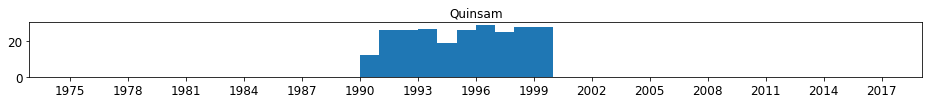

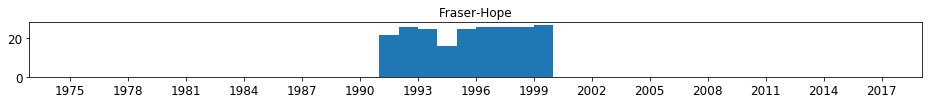

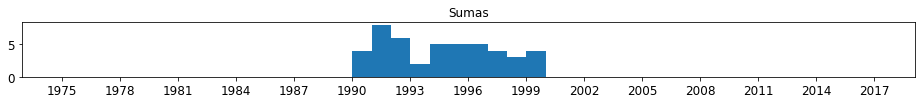

In [21]:
l=np.arange(1975,2018,1)
for (ff,i) in ll:
    fig,ax=plt.subplots(1,1,figsize=(16,1))
    yy=[x['TS'].year for i0,x in df0[ff].iterrows() if x[i]>=0]
    ax.hist(yy,l)
    ax.set_title(ff)
    ax.set_xticks(np.arange(1975,2018,3))

In [22]:
tr={'Qualicum':'Big Qualicum','YvesCreek':'Okeover'}

In [23]:
file1S=file1.loc[file1.S<.5]
file2S=file2.loc[file2.S<.5]
file3S=file3.loc[file3.salt<.5]
file4S=file4.loc[file4.Salinity<.5]

In [24]:
[el for el in df0['Fraser-Hope'].keys() if 'N' in el]

['Nitrite and Nitrate (as N) [Lab: 33] [VMV: 2233]',
 'Nitrogen Dissolved Nitrate [Lab: 1] [VMV: 7315]',
 'Nitrogen Dissolved Nitrate [Lab: 36] [VMV: 7315]',
 'Nitrogen Dissolved Nitrate [Lab: -54] [VMV: 1115]',
 'Nitrogen Dissolved NO3 & NO2 [Lab: 36] [VMV: 7110]',
 'Nitrogen Dissolved NO3 & NO2 [Lab: 1] [VMV: 7110]',
 'Nitrogen Dissolved NO3 & NO2 [Lab: -54] [VMV: 1100]',
 'Nitrogen Nitrite [Lab: 1] [VMV: 444]',
 'Nitrogen Nitrite [Lab: 36] [VMV: 444]',
 'Nitrogen Nitrite [Lab: -54] [VMV: 1099]',
 'Nitrogen Nitrite [Lab: 33] [VMV: 1970]',
 'Nitrogen Total [Lab: -54] [VMV: 1130]',
 'Nitrogen Total [Lab: -54] [VMV: 107192]',
 'Nitrogen Total [Lab: 33] [VMV: 1967]',
 'Nitrogen Total Nitrate [Lab: 33] [VMV: 1971]']

In [25]:
[el for el in df0['Fraser-Gravesend'].keys() if 'N' in el]

['Nitrite and Nitrate (as N) [Lab: 33] [VMV: 2233]',
 'Nitrogen Dissolved Kjeldahl [Lab: -54] [VMV: 1120]',
 'Nitrogen Dissolved Nitrate [Lab: -54] [VMV: 1115]',
 'Nitrogen Dissolved NO3 & NO2 [Lab: -54] [VMV: 1100]',
 'Nitrogen Dissolved Organic (Calcd.) [Lab: 33] [VMV: 1116]',
 'Nitrogen Nitrite [Lab: -54] [VMV: 1099]',
 'Nitrogen Nitrite [Lab: 33] [VMV: 1970]',
 'Nitrogen Total Nitrate [Lab: 33] [VMV: 1971]',
 'Nitrogen Total Organic (Calcd.) [Lab: 33] [VMV: 2238]']

In [26]:
for el in df0.keys():
    if el not in ('Fraser-Hope','Fraser-Gravesend','Sumas'):
        for ell in df0[el].keys():
            if 'N' in ell:
                print(el,ell)

Quinsam Nitrite and Nitrate (as N) [Lab: 33] [VMV: 2233]
Quinsam Nitrogen Dissolved Nitrate [Lab: 1] [VMV: 7315]
Quinsam Nitrogen Dissolved Nitrate [Lab: 36] [VMV: 7315]
Quinsam Nitrogen Dissolved Nitrate [Lab: -54] [VMV: 1115]
Quinsam Nitrogen Dissolved NO3 & NO2 [Lab: 36] [VMV: 7110]
Quinsam Nitrogen Dissolved NO3 & NO2 [Lab: 1] [VMV: 7110]
Quinsam Nitrogen Dissolved NO3 & NO2 [Lab: -54] [VMV: 1100]
Quinsam Nitrogen Nitrite [Lab: 1] [VMV: 444]
Quinsam Nitrogen Nitrite [Lab: 36] [VMV: 444]
Quinsam Nitrogen Nitrite [Lab: -54] [VMV: 1099]
Quinsam Nitrogen Nitrite [Lab: 33] [VMV: 1970]
Quinsam Nitrogen Total [Lab: 1] [VMV: 7617]
Quinsam Nitrogen Total [Lab: -54] [VMV: 1130]
Quinsam Nitrogen Total [Lab: -54] [VMV: 107192]
Quinsam Nitrogen Total [Lab: 33] [VMV: 1967]
Quinsam Nitrogen Total Nitrate [Lab: 33] [VMV: 1971]
Cheakamus Nitrite and Nitrate (as N) [Lab: 33] [VMV: 2233]
Cheakamus Nitrogen Dissolved Nitrate [Lab: -54] [VMV: 1115]
Cheakamus Nitrogen Dissolved NO3 & NO2 [Lab: -54] [VMV

In [44]:
llNO3O=list()
llNHO=list()
for ff in df0.keys():
    if ff not in ('Fraser-Hope','Fraser-Gravesend','Sumas'):
        llNO3O=llNO3O+[(ff,i) for i in df0[ff].keys() if ((re.search('[Nn]itrate',i) is not None and re.search('[Nn]itrite',i) is None))]
        llNHO=llNHO+[(ff,i) for i in df0[ff].keys() if ((re.search('[Aa]mm',i) is not None))]
print('NO3')
for (ff,i) in llNO3O:
    print(ff,i,np.min(df0[ff]['TS'][df0[ff][i]>=0]),np.max(df0[ff]['TS'][df0[ff][i]>=0]))
print('NH4')
for (ff,i) in llNHO:
    print(ff,i,np.min(df0[ff]['TS'][df0[ff][i]>=0]),np.max(df0[ff]['TS'][df0[ff][i]>=0]))

NO3
Quinsam Nitrogen Dissolved Nitrate [Lab: 1] [VMV: 7315] 1994-03-29 15:50:00 1994-09-27 15:55:00
Quinsam Nitrogen Dissolved Nitrate [Lab: 36] [VMV: 7315] 1994-10-13 20:15:00 1998-12-08 18:00:00
Quinsam Nitrogen Dissolved Nitrate [Lab: -54] [VMV: 1115] 2007-09-17 15:30:00 2015-05-25 20:40:00
Quinsam Nitrogen Total Nitrate [Lab: 33] [VMV: 1971] 2015-06-09 20:15:00 2019-11-25 20:35:00
Cheakamus Nitrogen Dissolved Nitrate [Lab: -54] [VMV: 1115] 2005-10-20 22:45:00 2015-05-26 19:55:00
Cheakamus Nitrogen Total Nitrate [Lab: 33] [VMV: 1971] 2015-06-08 20:05:00 2019-11-13 18:55:00
Cowichan Nitrogen Dissolved Nitrate [Lab: -54] [VMV: 1115] 2006-09-18 20:45:00 2015-05-20 20:10:00
Cowichan Nitrogen Total Nitrate [Lab: 33] [VMV: 1971] 2015-06-03 20:10:00 2019-11-14 19:30:00
Tsolum Nitrogen Dissolved Nitrate [Lab: -54] [VMV: 1115] 2009-04-29 22:30:00 2015-05-05 18:00:00
Tsolum Nitrogen Total Nitrate [Lab: 33] [VMV: 1971] 2015-06-02 17:50:00 2019-11-26 18:45:00
Englishman Nitrogen Dissolved Nitra

In [28]:
llSi=list()
for ff in df0.keys():
    llSi=llSi+[(ff,i) for i in df0[ff].keys() if ((re.search('[Ss]ili',i) is not None) ) and ((re.search('[Dd]iss',i) is not None) )]
print('Si')
for (ff,i) in llSi:
    print(ff,i,np.min(df0[ff]['TS'][df0[ff][i]>=0]),np.max(df0[ff]['TS'][df0[ff][i]>=0]))

Si
Quinsam Silica Dissolved [Lab: 36] [VMV: 103469] 1990-06-05 17:20:00 1999-12-21 20:25:00
Cowichan Silicon Dissolved [Lab: -54] [VMV: 108166] 2008-10-14 20:50:00 2008-11-03 20:50:00
Tsolum Silicon Dissolved [Lab: -54] [VMV: 108166] 2009-01-08 18:50:00 2010-10-26 20:35:00
Englishman Silicon Dissolved [Lab: -54] [VMV: 108166] 2010-08-16 17:47:00 2010-09-15 16:05:00
Fraser-Hope Silica Dissolved [Lab: 36] [VMV: 103469] 1991-03-08 18:10:00 1999-12-21 22:10:00
Sumas Silica Dissolved [Lab: 36] [VMV: 103469] 1990-02-28 23:20:00 1999-11-30 21:26:00
Sumas Silicon Dissolved [Lab: -54] [VMV: 1175] 2007-05-02 21:00:00 2007-10-03 19:35:00


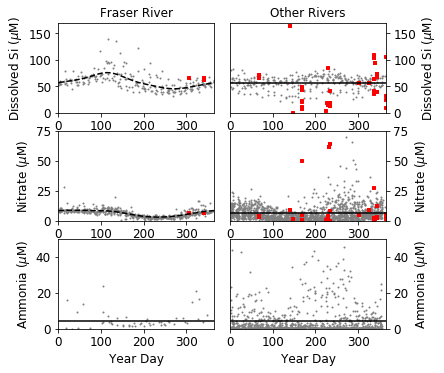

In [43]:
mt='s'
ms1=2
ms2=3
#fig,ax=plt.subplots(3,2,figsize=(6.5,6))

fig = plt.figure(figsize=(6,5))
gs = gridspec.GridSpec(3,2,left=.12,right=.88,hspace=.2,wspace=.1,bottom=0.1,top=.95)
ax=list()
ax.append(fig.add_subplot(gs[0,0]))
ax.append(fig.add_subplot(gs[0,1]))
ax.append(fig.add_subplot(gs[1,0]))
ax.append(fig.add_subplot(gs[1,1]))
ax.append(fig.add_subplot(gs[2,0]))
ax.append(fig.add_subplot(gs[2,1]))

ax[0].plot(df0['Fraser-Hope']['YD'],df0['Fraser-Hope']['Silica Dissolved [Lab: 36] [VMV: 103469]']/mwSiO2*1000.0,'.',markersize=ms1,color='gray')
ax[0].set_xlim(0,366)
ax[0].set_ylim(0,170)
ax[0].set_yticks((0,50,100,150))
ax[0].set_xlabel('Year Day')
ax[0].set_ylabel('Dissolved Si ($\mu$M)')
ax[0].set_title('Fraser River')
ax[0].plot(file3S.loc[file3S.river=='Fraser',['YD']],file3S.loc[file3S.river=='Fraser',['Si']],mt,color='r',
                markersize=ms2)
ax[0].plot((dt.datetime(2017,11,1)-dt.datetime(2016,12,31)).days,67,mt,color='r',markersize=ms2) # add my Fraser data point
ax[0].plot(np.arange(1,367),listFraserOldSi,'k--')

ax[2].plot(df0['Fraser-Hope']['YD'],df0['Fraser-Hope']['Nitrogen Dissolved NO3 & NO2 [Lab: 36] [VMV: 7110]']/mwN*1000.0,'.',
           markersize=ms1,color='gray')
ax[2].plot(df0['Fraser-Hope']['YD'],df0['Fraser-Hope']['Nitrogen Dissolved NO3 & NO2 [Lab: 1] [VMV: 7110]']/mwN*1000.0,'.',
           markersize=ms1,color='gray')
ax[2].plot(df0['Fraser-Hope']['YD'],df0['Fraser-Hope']['Nitrogen Dissolved NO3 & NO2 [Lab: -54] [VMV: 1100]']/mwN*1000.0,'.',
           markersize=ms1,color='gray')
ax[2].plot(df0['Fraser-Gravesend']['YD'],df0['Fraser-Gravesend']['Nitrogen Dissolved NO3 & NO2 [Lab: -54] [VMV: 1100]']/mwN*1000.0,'.',
           markersize=ms1,color='gray')
ax[2].plot(file3S.loc[file3S.river=='Fraser',['YD']],file3S.loc[file3S.river=='Fraser',['N']],mt,color='r',
                markersize=ms2)
ax[2].plot((dt.datetime(2017,11,1)-dt.datetime(2016,12,31)).days,6.93,mt,color='r',markersize=ms2) # add my Fraser data point
ax[2].plot(np.arange(1,367),listFraserOldN,'k--')
ax[2].set_xlim(0,366)
ax[2].set_ylim(0,75)
ax[2].set_xlabel('Year Day')
ax[2].set_ylabel('Nitrate ($\mu$M)')

ax[4].plot(df0['Fraser-Hope']['YD'],df0['Fraser-Hope']['Ammonia Dissolved [Lab: 1] [VMV: 7557]']/mwN*1000.0,
           '.',markersize=ms1,color='gray')
ax[4].plot(df0['Fraser-Gravesend']['YD'],df0['Fraser-Gravesend']['Ammonia Dissolved [Lab: -54] [VMV: 1109]']/mwN*1000.0,
           '.',markersize=ms1,color='gray')
ax[4].set_xlabel('Year Day')
ax[4].set_ylabel('Ammonia ($\mu$M)')
ax[4].plot(np.arange(1,367),nhFraser*np.ones(len(np.arange(1,367))),'k-')
ax[4].set_xlim(0,366)
ax[4].set_ylim(0,50)

ax[1].plot(df0['Quinsam']['YD'],df0['Quinsam']['Silica Dissolved [Lab: 36] [VMV: 103469]']/mwSiO2*1000.0,'.',
           markersize=ms1,color='gray')
ax[1].plot(df0['Cowichan']['YD'],df0['Cowichan']['Silicon Dissolved [Lab: -54] [VMV: 108166]']/mwSiO2*1000.0,'.',
           markersize=ms1,color='gray')
ax[1].plot(df0['Englishman']['YD'],df0['Englishman']['Silicon Dissolved [Lab: -54] [VMV: 108166]']/mwSiO2*1000.0,'.',
           markersize=ms1,color='gray')
ax[1].plot(df0['Tsolum']['YD'],df0['Tsolum']['Silicon Dissolved [Lab: -54] [VMV: 108166]']/mwSiO2*1000.0,'.',
           markersize=ms1,color='gray')
for ff in file1S['river'].values:
    if 'Fraser' not in ff:
        ax[1].plot(file1S.loc[file1S.river==ff,['YD']],file1S.loc[file1S.river==ff,['Si_uM']],mt,color='r',
                markersize=ms2)
for ff in file2S['river'].values:
    if 'Fraser' not in ff:
        ax[1].plot(file2S.loc[file2S.river==ff,['YD']],file2S.loc[file2S.river==ff,['Si_uM']],mt,color='r',
                markersize=ms2)
for ff in file3S['river'].values:
    if 'Fraser' not in ff:
        ax[1].plot(file3S.loc[file3S.river==ff,['YD']],file3S.loc[file3S.river==ff,['Si']],mt,color='r',
                markersize=ms2)
for ff in file4S['River'].values:
    if 'Fraser' not in ff:
        ax[1].plot(file4S.loc[file4S.River==ff,['YD']],file4S.loc[file4S.River==ff,['Silicate (uM)']],mt,color='r',
                markersize=ms2)
#ax[1].plot(df0['Fraser-Hope']['YD'],df0['Fraser-Hope']['Silica Dissolved [Lab: 36] [VMV: 103469]']/mwSiO2*1000.0,'.',label='EC',markersize=ms1,color='gray')
ax[1].set_xlim(0,366)
ax[1].set_ylim(0,170)
ax[1].set_yticks((0,50,100,150))
ax[1].set_xlabel('Year Day')
ax[1].set_ylabel('Dissolved Si ($\mu$M)')
#ax[1].set_ylabel('Dissolved Si ($\mu$M)')
ax[1].set_title('Other Rivers')
ax[1].plot(np.arange(1,367),silOther*np.ones(len(np.arange(1,367))),'k-')
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")

for (ff,ii) in llNO3O:
    ax[3].plot(df0[ff]['YD'],df0[ff][ii]/mwN*1000.0,'.',markersize=ms1,color='gray')
for ff in file1S['river'].values:
    if 'Fraser' not in ff:
        ax[3].plot(file1S.loc[file1S.river==ff,['YD']],file1S.loc[file1S.river==ff,['NO3']],mt,color='r',
                markersize=ms2)
for ff in file2S['river'].values:
    if 'Fraser' not in ff:
        ax[3].plot(file2S.loc[file2S.river==ff,['YD']],file2S.loc[file2S.river==ff,['NO3']],mt,color='r',
                markersize=ms2)
for ff in file3S['river'].values:
    if 'Fraser' not in ff:
        ax[3].plot(file3S.loc[file3S.river==ff,['YD']],file3S.loc[file3S.river==ff,['N']],mt,color='r',
                markersize=ms2)
for ff in file4S['River'].values:
    if 'Fraser' not in ff:
        ax[3].plot(file4S.loc[file4S.River==ff,['YD']],file4S.loc[file4S.River==ff,['Nitrate_plus_Nitrite (uM)']],
                   mt,color='r',markersize=ms2)
ax[3].set_xlim(0,366)
ax[3].set_ylim(0,75)
ax[3].set_xlabel('Year Day')
ax[3].set_ylabel('Nitrate ($\mu$M)')
#ax[3].set_ylabel('NO$_3$ ($\mu$M)')
ax[3].plot(np.arange(1,367),no3Other*np.ones(len(np.arange(1,367))),'k-')
ax[3].yaxis.tick_right()
ax[3].yaxis.set_label_position("right")

for (ff,ii) in llNHO:
    ix=df0[ff][ii]>=0
    ax[5].plot(df0[ff].loc[ix,['YD']],df0[ff].loc[ix,[ii]]/mwN*1000.0,'.',markersize=ms1,color='gray')
ax[5].plot(np.arange(1,367),nhOther*np.ones(len(np.arange(1,367))),'k-')
ax[5].set_xlabel('Year Day')
ax[5].set_ylabel('Ammonia ($\mu$M)')
#ax[5].set_ylabel('Ammonia ($\mu$M)')
ax[5].yaxis.tick_right()
ax[5].yaxis.set_label_position("right")
ax[5].set_xlim(0,366)
ax[5].set_ylim(0,50)
fig.savefig('/data/eolson/MEOPAR/biomodelevalpaper/response/RiverNuts.eps',dpi = 400, transparent=False)